In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

PATH_FIGURES = "/Users/giovanni.palla/Projects/squidpy_reproducibility/notebooks/graph_figures/figures"

scanpy==1.8.0.dev78+gc488909a anndata==0.7.5 umap==0.4.6 numpy==1.20.1 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3


In [2]:
adata = sq.datasets.merfish()
adata

AnnData object with n_obs × n_vars = 73655 × 161
    obs: 'Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'batch'
    uns: 'Cell_class_colors'
    obsm: 'spatial', 'spatial3d'

In [16]:
_3d = adata.obsm["spatial3d"].copy()
adata.obsm["3dspatial"] = np.stack([_3d[:, 0], _3d[:, 1], _3d[::-1, 2]], axis=1)

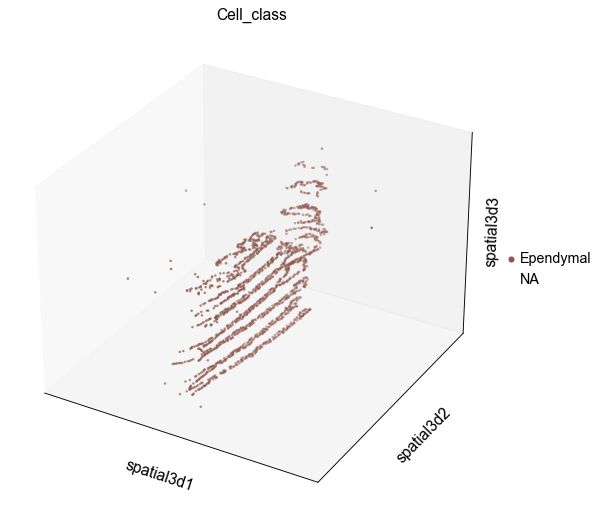

In [20]:
sc.pl.embedding(
    adata,
    basis="spatial3d",
    color="Cell_class",
    projection="3d",
    groups=["Ependymal"],
    na_color=(1, 1, 1, 0),
)

In [25]:
sq.gr.spatial_neighbors(adata)

Creating graph using `generic` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [26]:
sq.gr.nhood_enrichment(adata, cluster_key="Cell_class")

Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['Cell_class_nhood_enrichment']`
Finish (0:00:11)


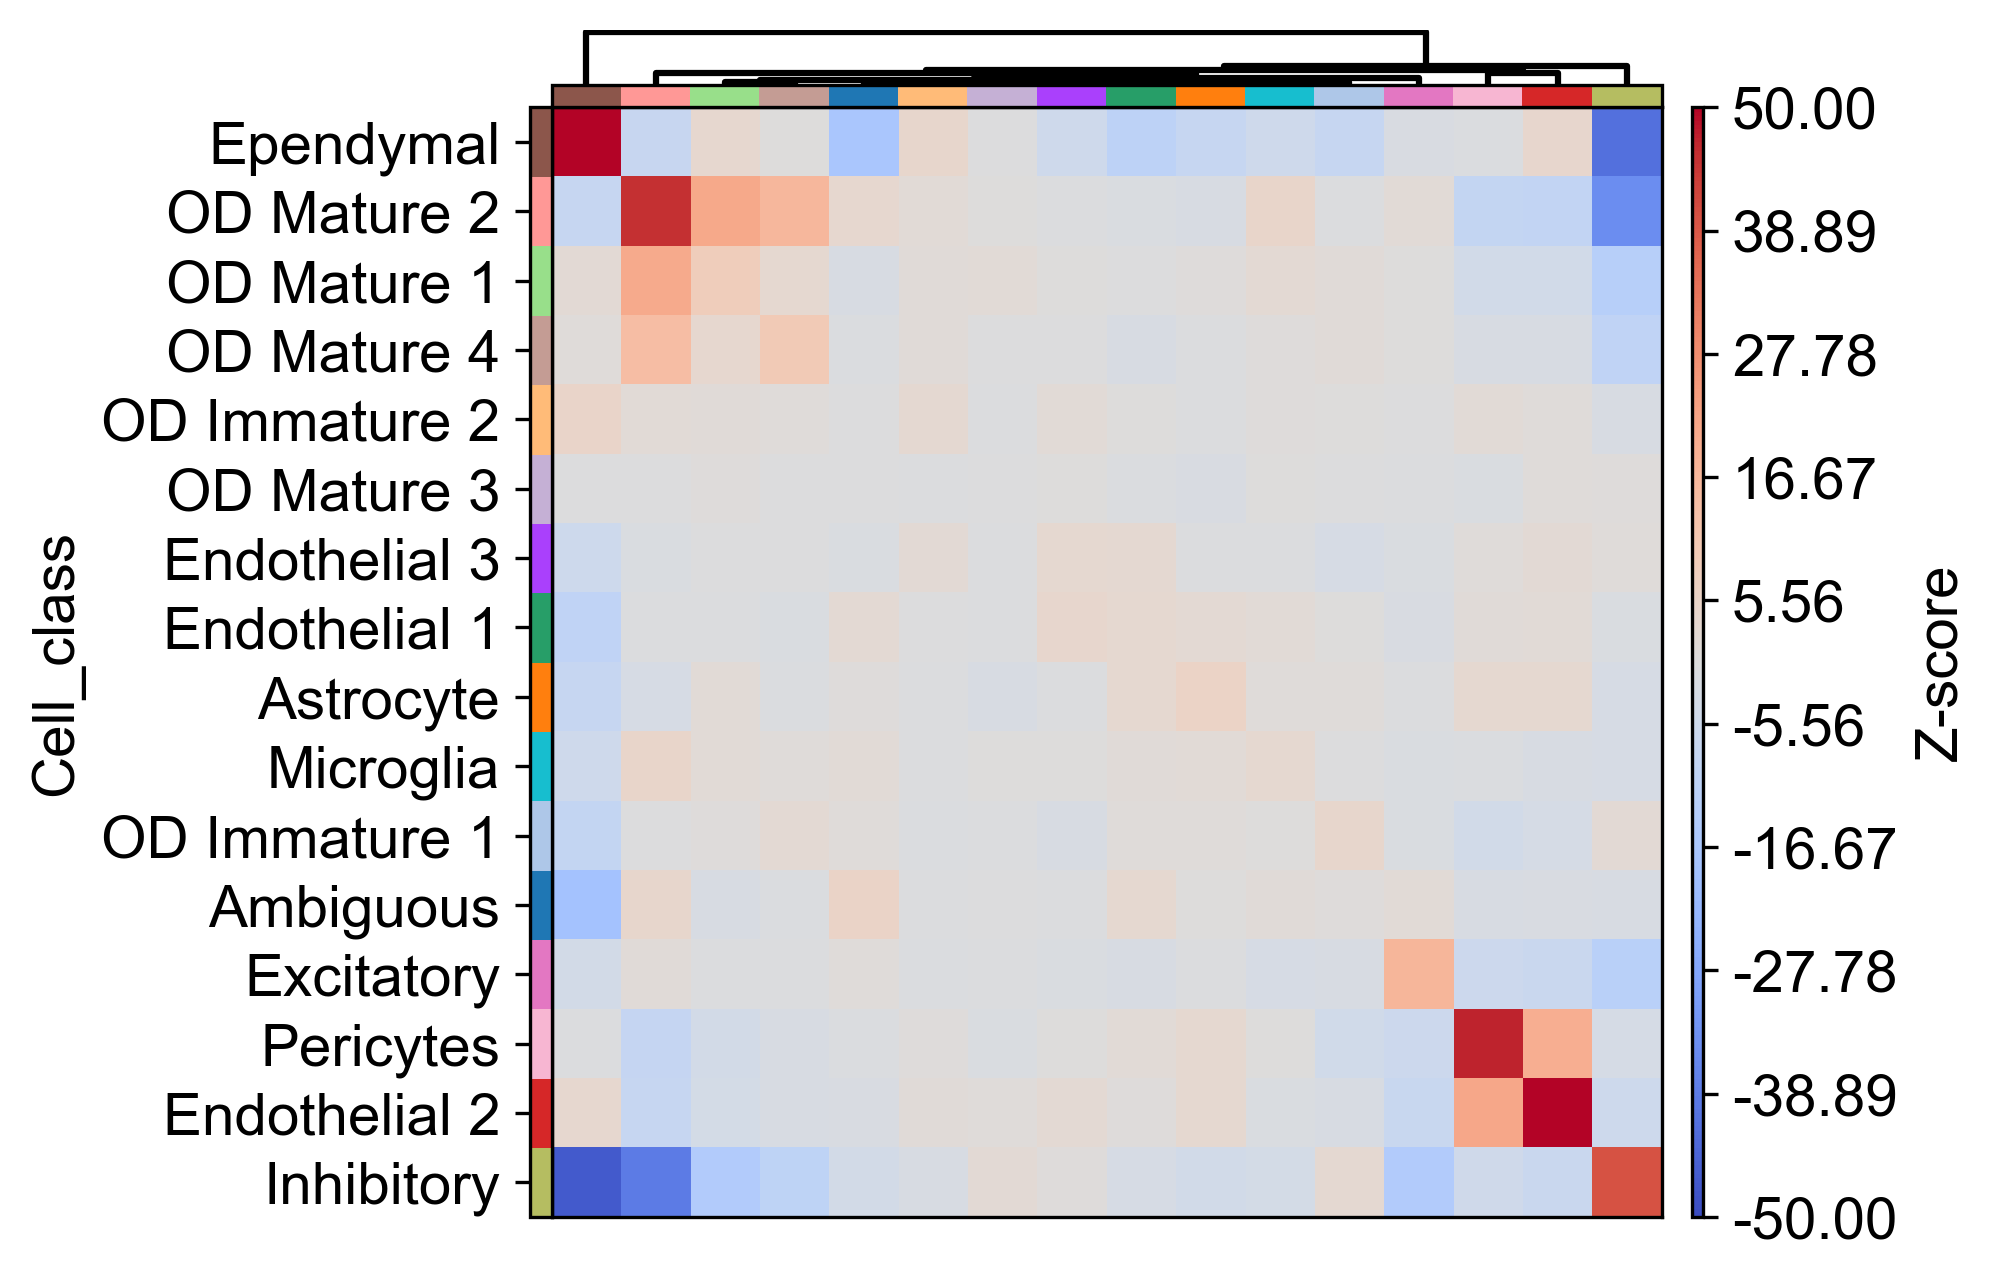

In [34]:
sq.pl.nhood_enrichment(
    adata,
    cluster_key="Cell_class",
    cmap="coolwarm",
    title="",
    method="single",
    dpi=300,
    figsize=(5, 4),
    save="nhod_merfish.png",
    cbar_kwargs={"label": "Z-score"},
    vmin=-50,
    vmax=50,
)

In [37]:
adata.obsm["spatial_"] = adata.obsm["spatial3d"].copy()

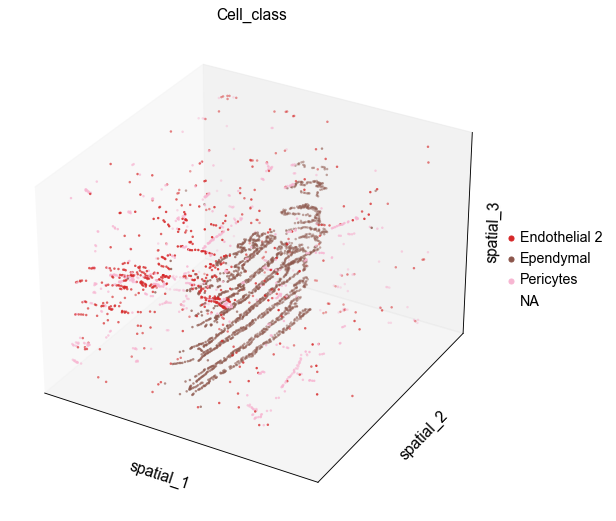

In [38]:
sc.pl.embedding(
    adata,
    basis="spatial_",
    color="Cell_class",
    projection="3d",
    groups=["Ependymal", "Endothelial 2", "Pericytes"],
    na_color=(1, 1, 1, 0),
    save="_group_merfish.png",
)

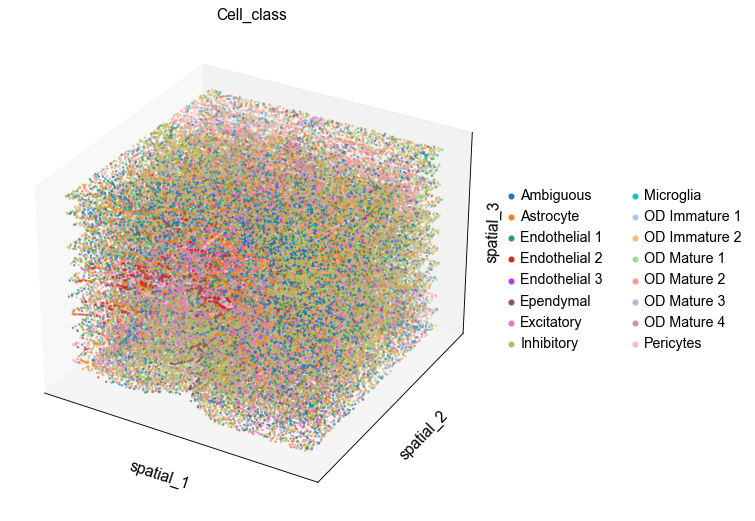

In [39]:
sc.pl.embedding(
    adata,
    basis="spatial_",
    color="Cell_class",
    projection="3d",
    #     groups=["Ependymal", "Endothelial 2", "Pericytes"],
    na_color=(1, 1, 1, 0),
    save="_total_merfish.png",
)